In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression


In [2]:
df = pd.read_csv('raw/disaster_tweets.csv')

In [3]:
df.shape

(7613, 5)

In [4]:
df.head(3)

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   

   target  
0       1  
1       1  
2       1

In [5]:
df.info()
#Spalten 3 und 4 text, target vollständig, Spalte 1 keyword 99% und Spalte 2 location etwa 67%

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [6]:
df.keyword.nunique()
#nur 221 verschiedene keywords in 7552 entries rd. 3%

221

In [7]:
df.keyword.unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [8]:
df.location.nunique()
#nur wenige locations mehrmals

3341

In [9]:
df.location.unique()

array([nan, 'Birmingham', 'Est. September 2012 - Bristol', ...,
       'Vancouver, Canada', 'London ', 'Lincoln'], dtype=object)

In [10]:
dfk = df.drop('location', axis = 1)

In [11]:
dfk.columns

Index(['id', 'keyword', 'text', 'target'], dtype='object')

In [12]:
dfk.shape

(7613, 4)

In [13]:
dfk = dfk.dropna().copy()

In [135]:
dfk.shape
#alphabet. order by keyword

(7552, 4)

In [134]:
dfk.sample(10)

id       keyword                                               text  \
5399  7702     panicking  I hear the mumbling i hear the cackling i got ...   
3859  5489        flames  I chose you so if we can search for the joy of...   
658    952         blaze  What Dems do. Blaze covered months ago.Chicago...   
3980  5656      flooding  Monsoon Flooding Kills Dozens In Myanmar Promp...   
1584  2286  cliff%20fall  @SZMNextDoor I got this cute lil cliff you can...   
1569  2266  cliff%20fall     If u faved that I hope you fall off a cliff ??   
3713  5281          fear  Help me win $$$$ by having the most shares on ...   
5952  8503     screaming                           @BizzleMahomie SCREAMING   
970   1405    body%20bag  new summer long thin body bag hip A word skirt...   
821   1195      blizzard  #Tweet4Taiji is a dolphin worship group based ...   

      target  
5399       0  
3859       0  
658        0  
3980       1  
1584       0  
1569       0  
3713       0  
5952       0  
970        0  
821        1

In [126]:
l=[]

for elem in dfk.keyword:
    if '%20' in elem:
        elem1 = elem.replace('%20', '')
    else:
        elem1 = elem
        
    print(elem1)
        

ablaze
ablaze
ablaze
ablaze
ablaze
ablaze
ablaze
ablaze
ablaze
ablaze
ablaze
ablaze
ablaze
ablaze
ablaze
ablaze
ablaze
ablaze
ablaze
ablaze
ablaze
ablaze
ablaze
ablaze
ablaze
ablaze
ablaze
ablaze
ablaze
ablaze
ablaze
ablaze
ablaze
ablaze
ablaze
ablaze
accident
accident
accident
accident
accident
accident
accident
accident
accident
accident
accident
accident
accident
accident
accident
accident
accident
accident
accident
accident
accident
accident
accident
accident
accident
accident
accident
accident
accident
accident
accident
accident
accident
accident
accident
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
airplaneaccident
airplaneaccident
airplaneaccident
airplane

emergencyservices
emergencyservices
emergencyservices
emergencyservices
emergencyservices
emergencyservices
emergencyservices
emergencyservices
emergencyservices
emergencyservices
emergencyservices
emergencyservices
emergencyservices
emergencyservices
emergencyservices
engulfed
engulfed
engulfed
engulfed
engulfed
engulfed
engulfed
engulfed
engulfed
engulfed
engulfed
engulfed
engulfed
engulfed
engulfed
engulfed
engulfed
engulfed
engulfed
engulfed
engulfed
engulfed
engulfed
engulfed
engulfed
engulfed
engulfed
engulfed
engulfed
engulfed
engulfed
engulfed
engulfed
engulfed
engulfed
engulfed
epicentre
epicentre
epicentre
epicentre
epicentre
epicentre
epicentre
epicentre
epicentre
epicentre
epicentre
epicentre
evacuate
evacuate
evacuate
evacuate
evacuate
evacuate
evacuate
evacuate
evacuate
evacuate
evacuate
evacuate
evacuate
evacuate
evacuate
evacuate
evacuate
evacuate
evacuate
evacuate
evacuate
evacuate
evacuate
evacuate
evacuate
evacuate
evacuate
evacuate
evacuate
evacuate
evacuate
evacuat

stretcher
stretcher
stretcher
stretcher
stretcher
stretcher
stretcher
stretcher
stretcher
stretcher
stretcher
stretcher
stretcher
stretcher
stretcher
stretcher
stretcher
stretcher
stretcher
stretcher
stretcher
stretcher
stretcher
stretcher
stretcher
stretcher
stretcher
stretcher
stretcher
stretcher
stretcher
stretcher
structuralfailure
structuralfailure
structuralfailure
structuralfailure
structuralfailure
structuralfailure
structuralfailure
structuralfailure
structuralfailure
structuralfailure
structuralfailure
structuralfailure
structuralfailure
structuralfailure
structuralfailure
structuralfailure
structuralfailure
structuralfailure
structuralfailure
structuralfailure
structuralfailure
structuralfailure
structuralfailure
structuralfailure
structuralfailure
structuralfailure
structuralfailure
structuralfailure
structuralfailure
structuralfailure
structuralfailure
structuralfailure
structuralfailure
structuralfailure
structuralfailure
suicidebomb
suicidebomb
suicidebomb
suicidebomb
su

In [115]:
dfk.keyword.nunique()

221

In [116]:
dfk.keyword.unique()

array(['ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'derailed

In [112]:
wort.find('h')

8

In [15]:
keywords = pd.Series(dfk.keyword)

In [16]:
keywords.value_counts()

fatalities               45
armageddon               42
deluge                   42
damage                   41
harm                     41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

# Exkurs keyword ranking und cleaning

In [105]:
kw = pd.DataFrame(keywords.value_counts())
kw_top = kw.nlargest(20, 'keyword')
kw_top.head(7)

keyword
fatalities        45
armageddon        42
deluge            42
damage            41
harm              41
sinking           41
body%20bags       41

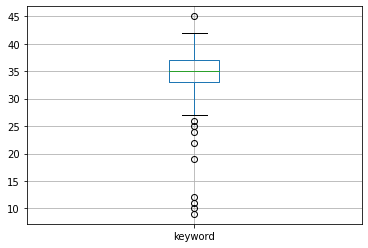

In [73]:
kw.boxplot('keyword')

In [75]:
#relativ geringe Streuung, Hälfte der Daten (Häufigkeit keyword) zw. 33 und 37, und etwa 95% der Daten zw. 27 und 43 
#1,5*IQR vom Boxenrand mit IQR = 4
kw.describe()

keyword
count  221.000000
mean    34.171946
std      4.786091
min      9.000000
25%     33.000000
50%     35.000000
75%     37.000000
max     45.000000

In [17]:
dfk.groupby(['keyword', 'target']).count()

id  text
keyword    target          
ablaze     0       23    23
           1       13    13
accident   0       11    11
           1       24    24
aftershock 0       34    34
...                ..   ...
wreck      0       30    30
           1        7     7
wreckage   1       39    39
wrecked    0       36    36
           1        3     3

[438 rows x 2 columns]

In [18]:
df_target = dfk.target.value_counts() #relativ balanciert, rd 43% (3229) = fire = 1 
df_target



0    4323
1    3229
Name: target, dtype: int64

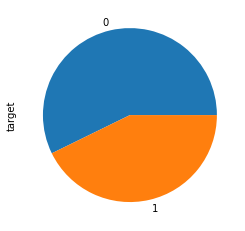

In [19]:
df_target.plot(kind = 'pie')

In [20]:
x = 0

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test =  train_test_split(dfk.keyword, dfk.target, test_size = 0.33, random_state=42)


In [43]:
X_train.shape

(5059,)

In [45]:
y_test.shape

(2493,)

acc_score_lr = 0.7264340152426795


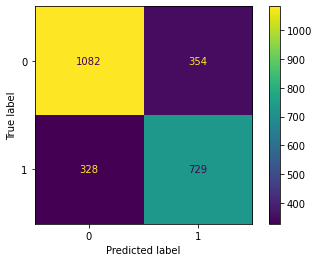

In [101]:
#one hot encoding der keywords ... get dummies

X_train_d = pd.get_dummies(X_train)

X_test_d = pd.get_dummies(X_test)


lr = LogisticRegression()

lr.fit(X_train_d, y_train)

y_pred_lr = lr.predict(X_test_d)

acc_score_lr = accuracy_score(y_test, y_pred_lr, normalize=True, sample_weight=None)

print(f'acc_score_lr = {acc_score_lr}')

plot_confusion_matrix(lr, X_test_d, y_test) 

plt.show()  

#score und confusion matrix based on 2493 test data

In [76]:
#may try alternative classifiers

acc_score_knc = 0.7188126754913758


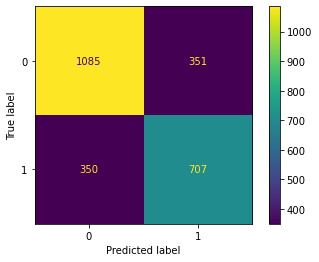

In [77]:
knc = KNeighborsClassifier()

knc.fit(X_train_d, y_train)

y_pred_knc = knc.predict(X_test_d)

acc_score_knc = accuracy_score(y_test, y_pred_knc, normalize=True, sample_weight=None)

print(f'acc_score_knc = {acc_score_knc}')

plot_confusion_matrix(knc, X_test_d, y_test) 

plt.show()  

#KNeighbors etwas schlechtere Performance

In [102]:
#may try k best selection of variables = keywords
from sklearn.feature_selection import SelectKBest, chi2
chi2_10 = SelectKBest(chi2, k=10)
X_train_10 = chi2_10.fit_transform(X_train_d, y_train)
X_test_10 = chi2_10.fit_transform(X_test_d, y_test)


#erhalte top 10 column names
col_names_10 = X_train_d.columns[chi2_10.get_support()]
print(col_names_10)


chi2_50 = SelectKBest(chi2, k=50)
X_train_50 = chi2_50.fit_transform(X_train_d, y_train)
X_test_50 = chi2_50.fit_transform(X_test_d, y_test)

#erhalte die top 50 column names
col_names_50 = X_train_d.columns[chi2_50.get_support()]
print(col_names_50)


chi2_200 = SelectKBest(chi2, k=200)
X_train_200 = chi2_200.fit_transform(X_train_d, y_train)
X_test_200 = chi2_200.fit_transform(X_test_d, y_test)

#erhalte die top 200 column names
col_names_200 = X_train_d.columns[chi2_200.get_support()]

print(type(list(col_names_200)))
      
print(len(col_names_200))


chi2_221 = SelectKBest(chi2, k=221)
X_train_221 = chi2_221.fit_transform(X_train_d, y_train)
X_test_221 = chi2_221.fit_transform(X_test_d, y_test)



Index(['debris', 'derailment', 'nuclear%20disaster', 'oil%20spill', 'outbreak',
       'rescuers', 'suicide%20bomber', 'suicide%20bombing', 'typhoon',
       'wreckage'],
      dtype='object')
Index(['aftershock', 'avalanche', 'blazing', 'bleeding', 'blew%20up', 'blight',
       'body%20bag', 'body%20bags', 'bombing', 'bridge%20collapse',
       'buildings%20on%20fire', 'casualties', 'collision', 'crushed', 'debris',
       'derailment', 'devastation', 'drown', 'electrocute', 'evacuated',
       'explode', 'fear', 'flattened', 'floods', 'forest%20fire',
       'forest%20fires', 'hailstorm', 'hazardous', 'hellfire', 'inundated',
       'lava', 'mudslide', 'nuclear%20disaster', 'oil%20spill', 'outbreak',
       'panic', 'quarantine', 'razed', 'rescuers', 'screaming', 'stretcher',
       'suicide%20bomb', 'suicide%20bomber', 'suicide%20bombing', 'terrorist',
       'traumatised', 'typhoon', 'violent%20storm', 'wild%20fires',
       'wreckage'],
      dtype='object')
<class 'list'>
200


acc_score_lr10 = 0.6241476133172884


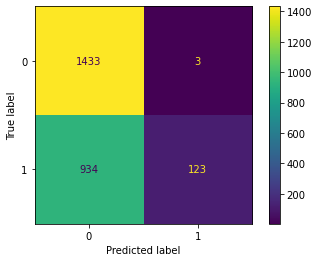

In [91]:
#try selected 10 best features = keywords

lr.fit(X_train_10, y_train)

y_pred_lr10 = lr.predict(X_test_10)

acc_score_lr10 = accuracy_score(y_test, y_pred_lr10, normalize=True, sample_weight=None)

print(f'acc_score_lr10 = {acc_score_lr10}')

plot_confusion_matrix(lr, X_test_10, y_test) 

plt.show()  

#score und confusion matrix based on 2493 test data

acc_score_lr50 = 0.5836341756919374


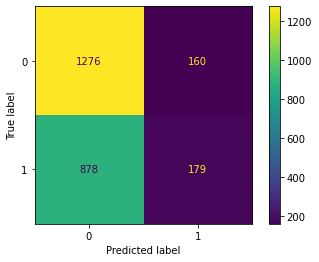

In [93]:
#try selected 50 best features = keywords

lr.fit(X_train_50, y_train)

y_pred_lr50 = lr.predict(X_test_50)

acc_score_lr50 = accuracy_score(y_test, y_pred_lr50, normalize=True, sample_weight=None)

print(f'acc_score_lr50 = {acc_score_lr50}')

plot_confusion_matrix(lr, X_test_50, y_test) 

plt.show()  

#score und confusion matrix based on 2493 test data

acc_score_lr200 = 0.6141195346971521


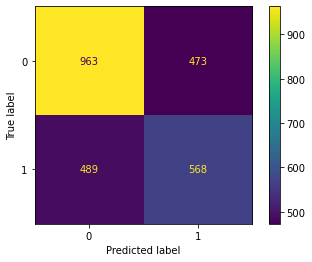

In [100]:
#try selected 200 best features = keywords

lr.fit(X_train_200, y_train)

y_pred_lr200 = lr.predict(X_test_200)

acc_score_lr200 = accuracy_score(y_test, y_pred_lr200, normalize=True, sample_weight=None)

print(f'acc_score_lr200 = {acc_score_lr200}')

plot_confusion_matrix(lr, X_test_200, y_test) 

plt.show()  

#score und confusion matrix based on 2493 test data

acc_score_lr221 = 0.7264340152426795


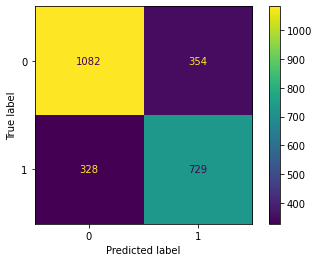

In [103]:
#quercheck mit allen 221 (selected best) features = keywords passed

lr.fit(X_train_221, y_train)

y_pred_lr221 = lr.predict(X_test_221)

acc_score_lr221 = accuracy_score(y_test, y_pred_lr221, normalize=True, sample_weight=None)

print(f'acc_score_lr221 = {acc_score_lr221}')

plot_confusion_matrix(lr, X_test_221, y_test) 

plt.show()  

#score und confusion matrix based on 2493 test data